In [2]:
import DataLoader, Training, os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
parameters = {
    # data
    "data_path": "F:/Masterthesis/Data",
    "task": "N170",
    "preprocessing": "medium",
    "n_subjects": 40,
    "reject_incorrect_responses": True,
    # model
    "model": "deep",
    "n_classes": 2,
    "n_chans": 30,
    "input_window_samples": 255,
    "seed": 42,
    # classifier
    "lr": 0.01,
    "weight_decay": 0.0,
    "batch_size": 64,
    "n_epochs": 25,
    "n_splits": 5,
    "model_folder": "models_within_subject"
}
for task in ["N170", "N400", "P3", "N2pc", "MMN", "ERN", "LRP"]:
    parameters["task"] = task
    df = DataLoader.load_df(parameters)
    Training.run_exp_per_subject(df, parameters)

In [170]:
# Load Dataframe
df_list = []
for task in ["N170", "N400", "P3", "N2pc", "MMN", "ERN", "LRP"]:
    model_path = os.getcwd()+"\\"+parameters["model_folder"]+"\\"+parameters[
        "model"]+"\\"+task+"\\"+parameters["preprocessing"]+"\\"
    for i in range(40):
        df = pd.read_json(model_path+"split_"+str(i)+"_history.json")
        df = df[df["epoch"]==25]
        df["SubjectID"] = i+1
        df["Task"] = task
        df_list.append(df[["Task", "SubjectID", "valid_balanced_accuracy"]])
df = pd.concat(df_list,axis=0)

In [176]:
df.groupby("Task").mean()["valid_balanced_accuracy"]

Task
ERN     0.893502
LRP     0.808257
MMN     0.592517
N170    0.752426
N2pc    0.663382
N400    0.742091
P3      0.738141
Name: valid_balanced_accuracy, dtype: float64

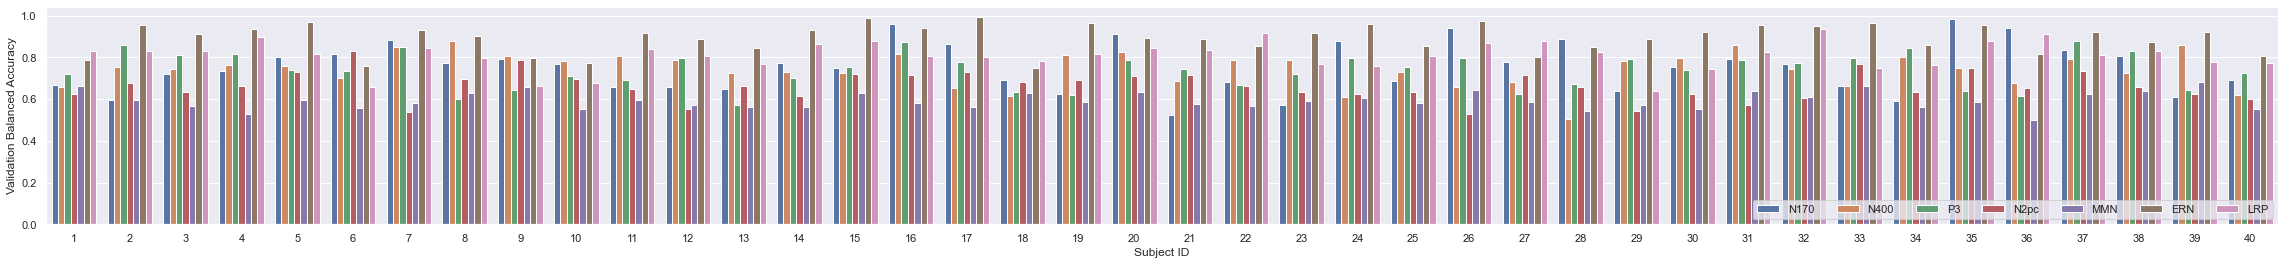

In [171]:
sns.set(style="darkgrid")
plt.figure(figsize=(40, 4))
fig = sns.barplot(x="SubjectID", y="valid_balanced_accuracy", hue="Task", data=df)
plt.legend(loc='lower right', ncol=7)
fig.set(xlabel='Subject ID', ylabel='Validation Balanced Accuracy');

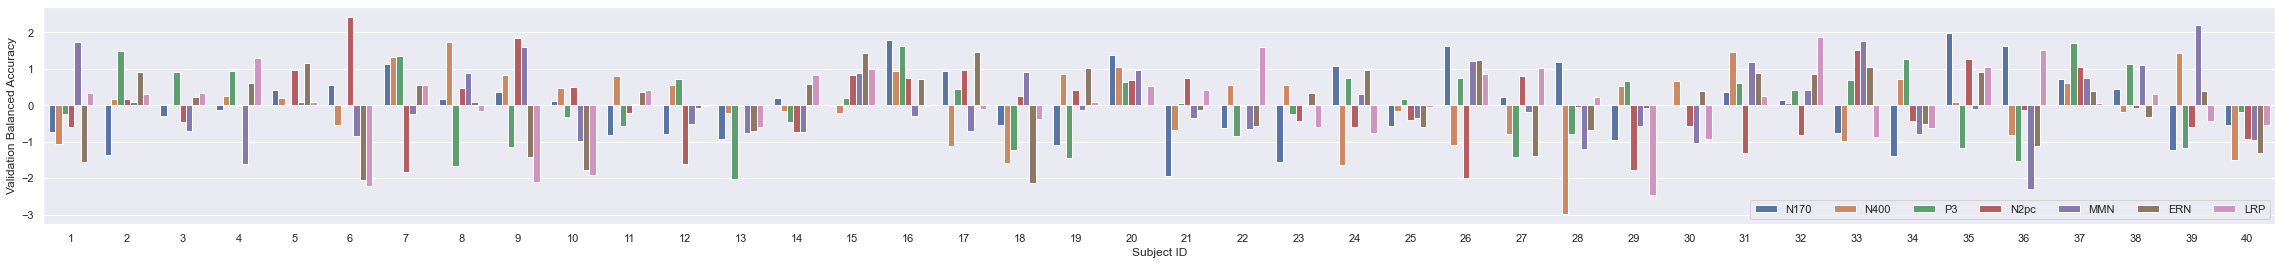

In [172]:
df["valid_balanced_accuracy_normalized"] = df.groupby(["Task"]).transform(lambda x: (x - x.mean()) / x.std())["valid_balanced_accuracy"]
sns.set(style="darkgrid")
plt.figure(figsize=(40, 4))
fig = sns.barplot(x="SubjectID", y="valid_balanced_accuracy_normalized", hue="Task", data=df)
plt.legend(loc='lower right', ncol=7)
fig.set(xlabel='Subject ID', ylabel='Validation Balanced Accuracy');

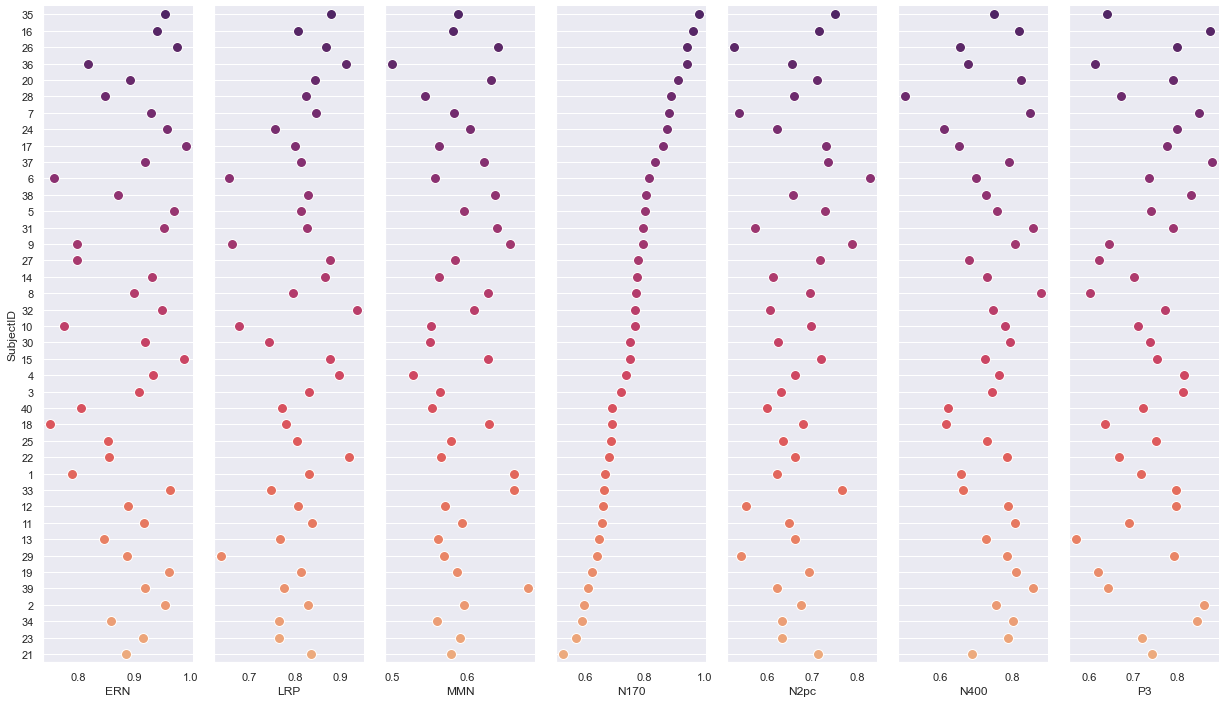

In [15]:
df_list = []
for task in ["N170", "N400", "P3", "N2pc", "MMN", "ERN", "LRP"]:
    model_path = os.getcwd()+"\\"+parameters["model_folder"]+"\\"+parameters[
        "model"]+"\\"+task+"\\"+parameters["preprocessing"]+"\\"
    for i in range(40):
        df = pd.read_json(model_path+"split_"+str(i)+"_history.json")
        
        #max_acc = df["valid_balanced_accuracy"].max() 
        df = df[df["epoch"]==25]
        #df["valid_balanced_accuracy"]=max_acc        
        df["SubjectID"] = i+1
        df["Task"] = task
        df_list.append(df[["Task", "SubjectID", "valid_balanced_accuracy"]])
df = pd.concat(df_list,axis=0)
df = df.pivot(index='SubjectID', columns='Task', values='valid_balanced_accuracy')
df = df.sort_values("N170", ascending=False)
df = df.reset_index().reset_index()
# Make the PairGrid
sns.set(style="darkgrid")
g = sns.PairGrid(df,
                 x_vars=df.columns[2:], y_vars=["SubjectID"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w", order=df["SubjectID"])

for ax in g.axes.flat:
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

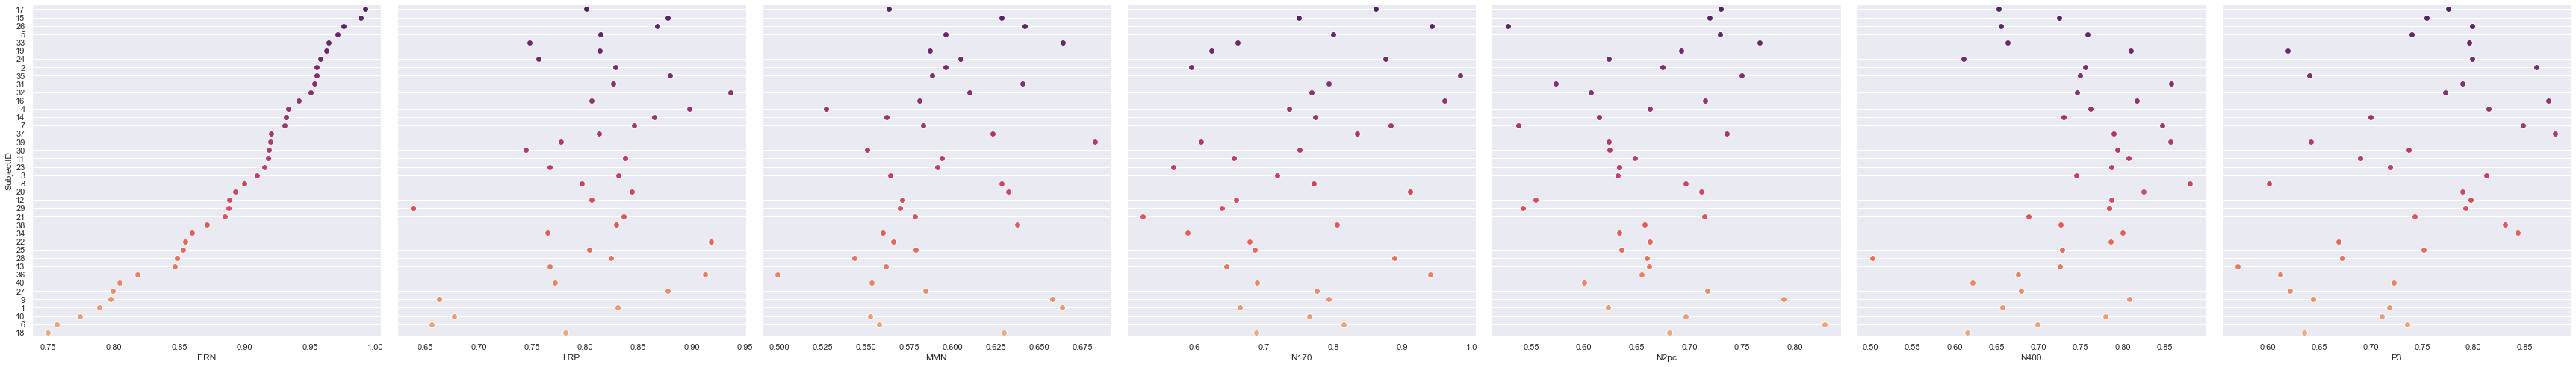

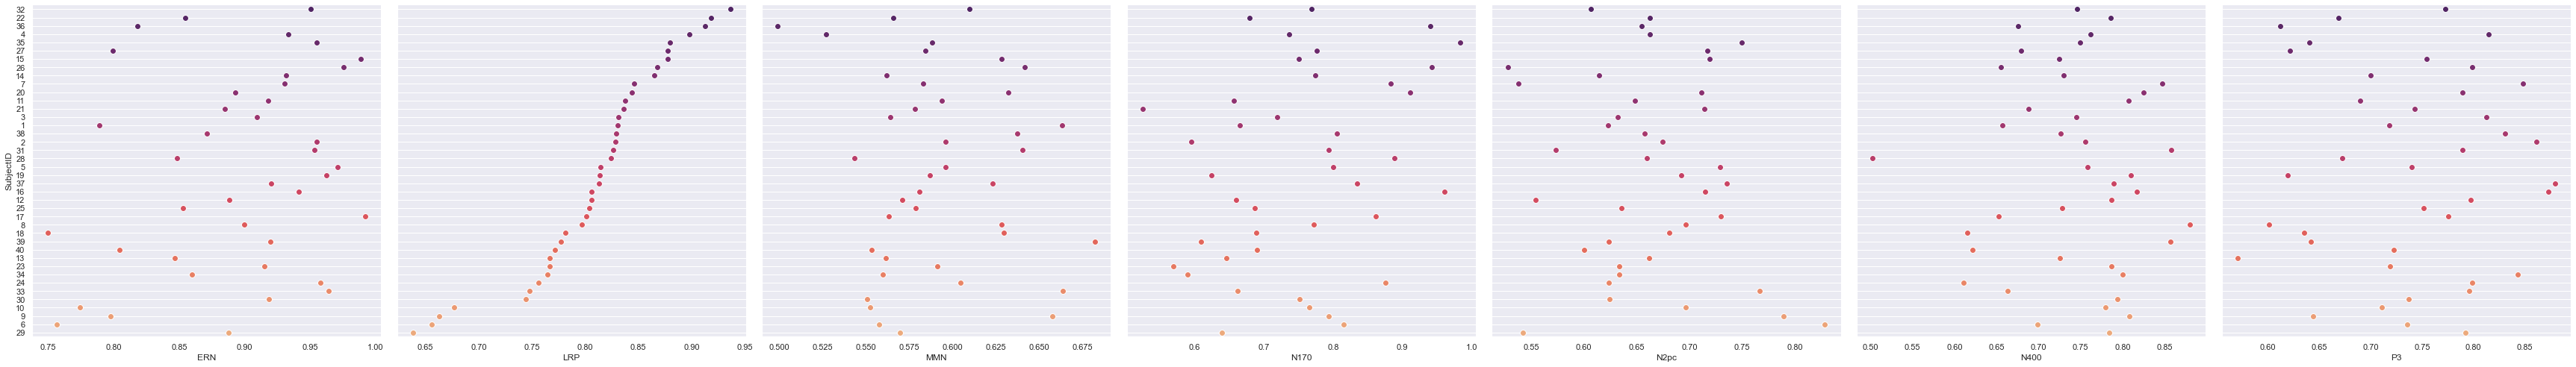

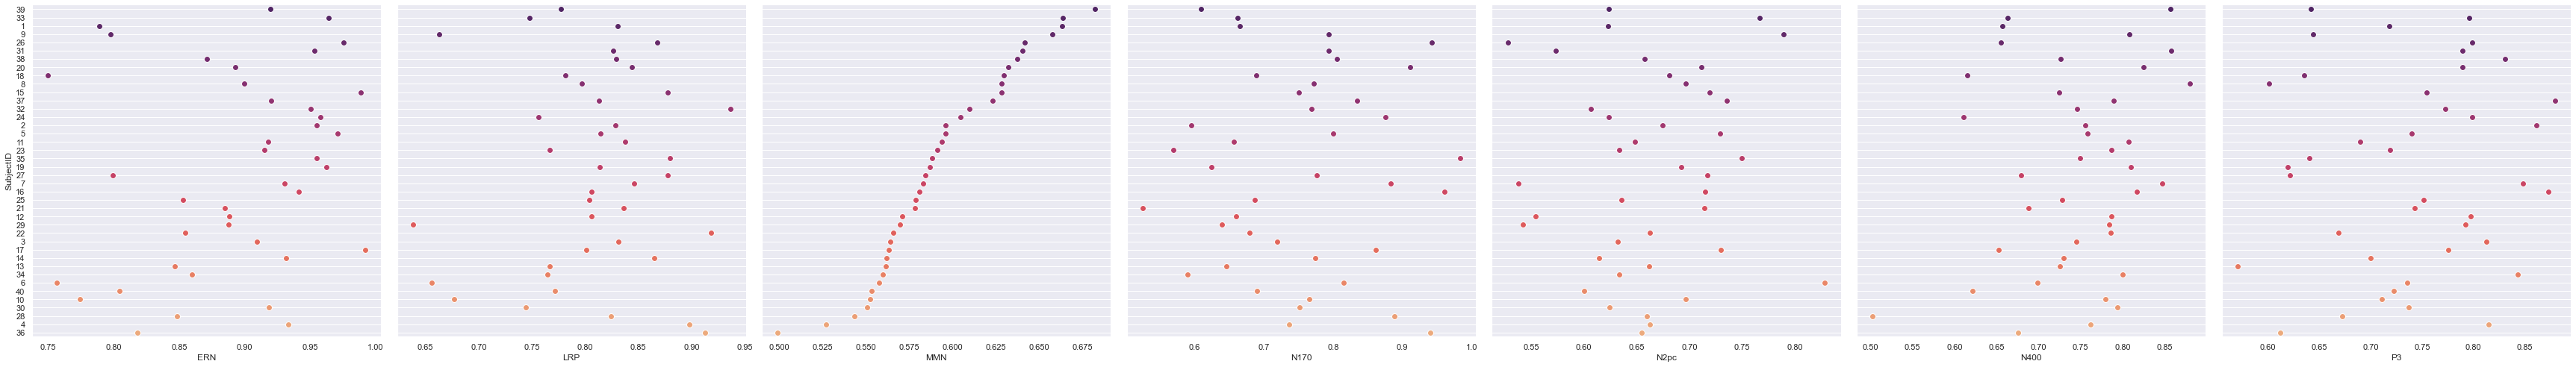

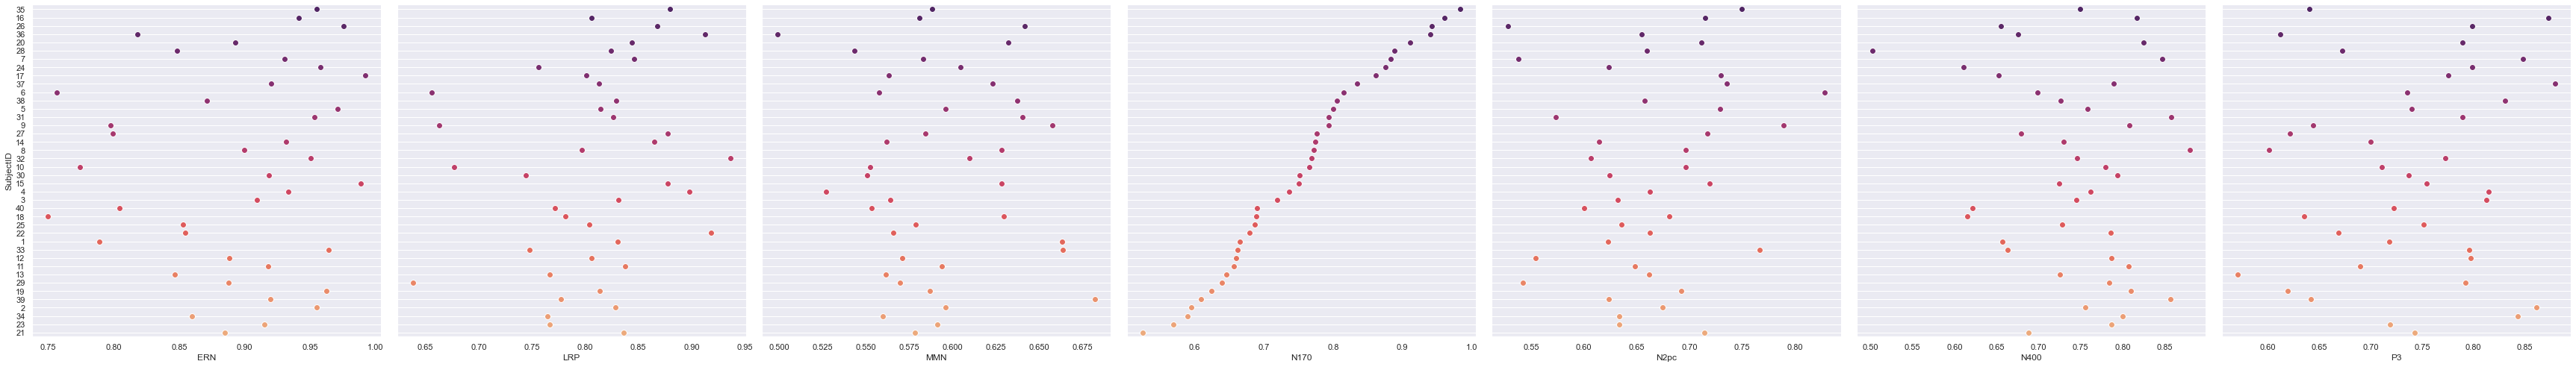

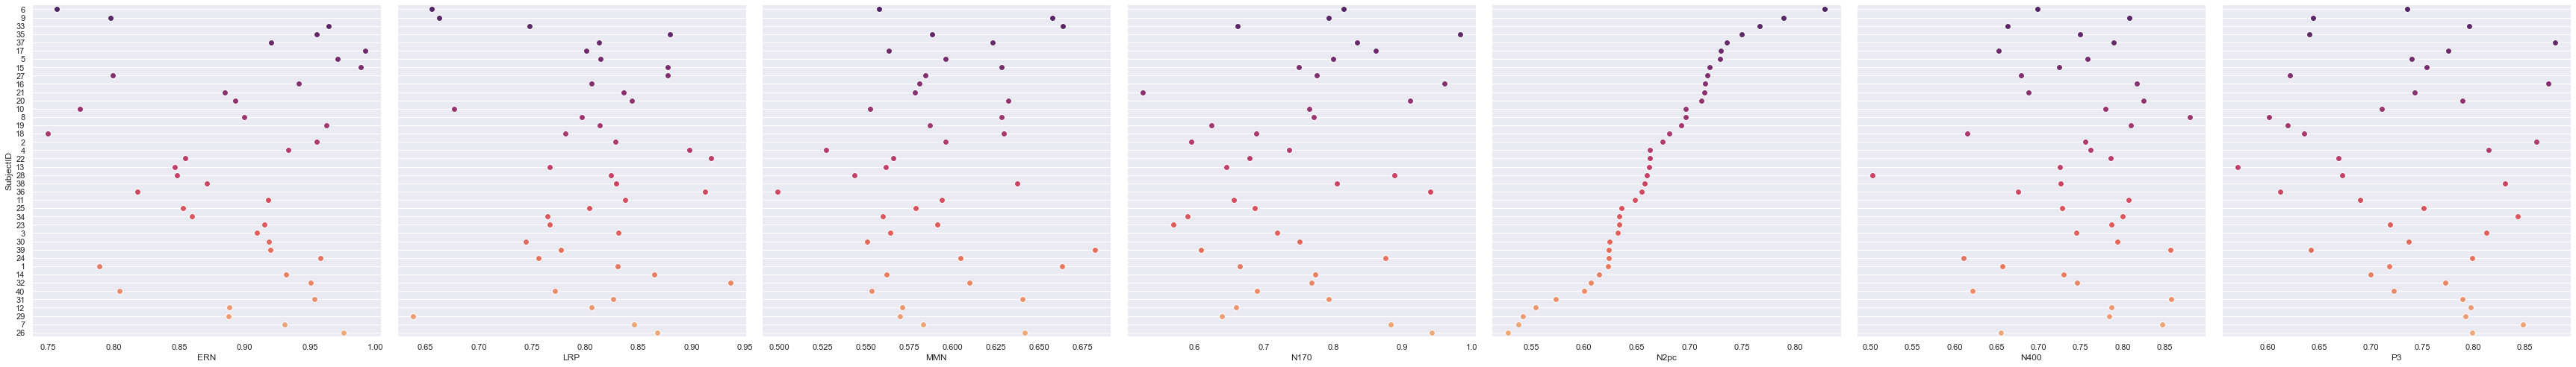

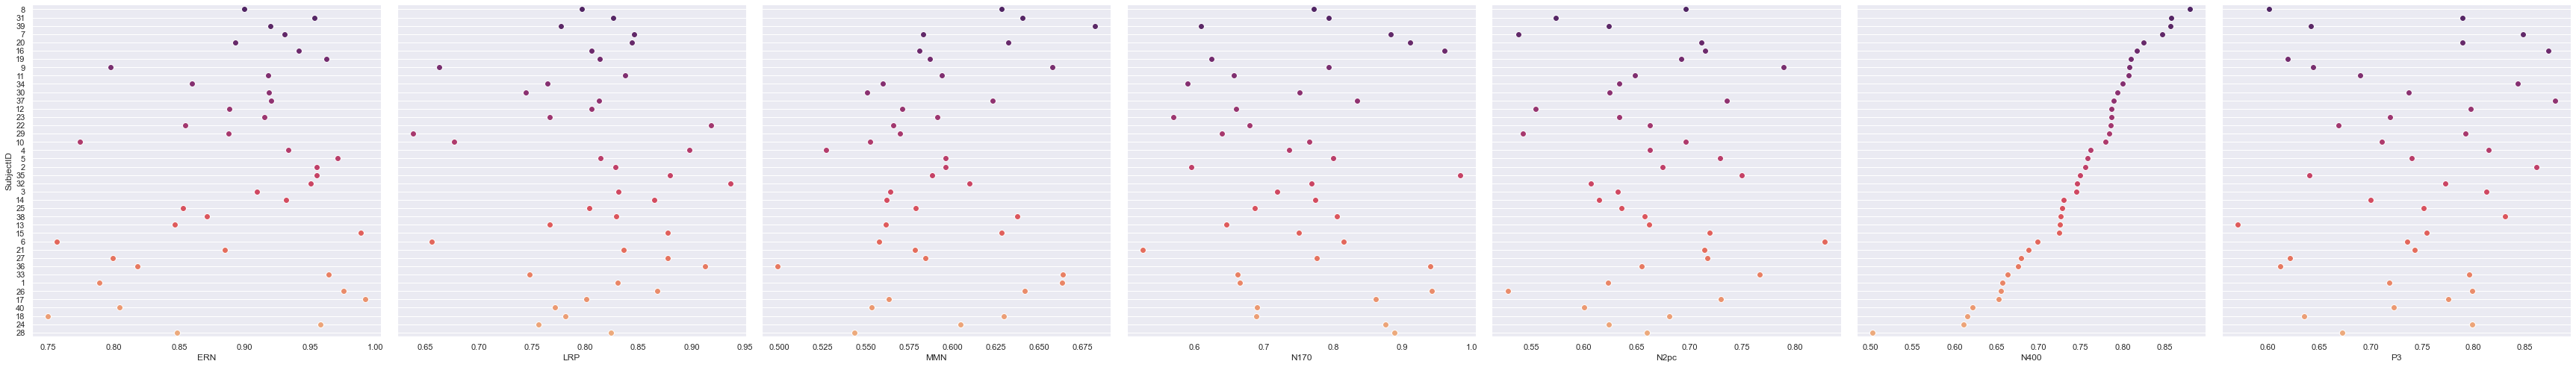

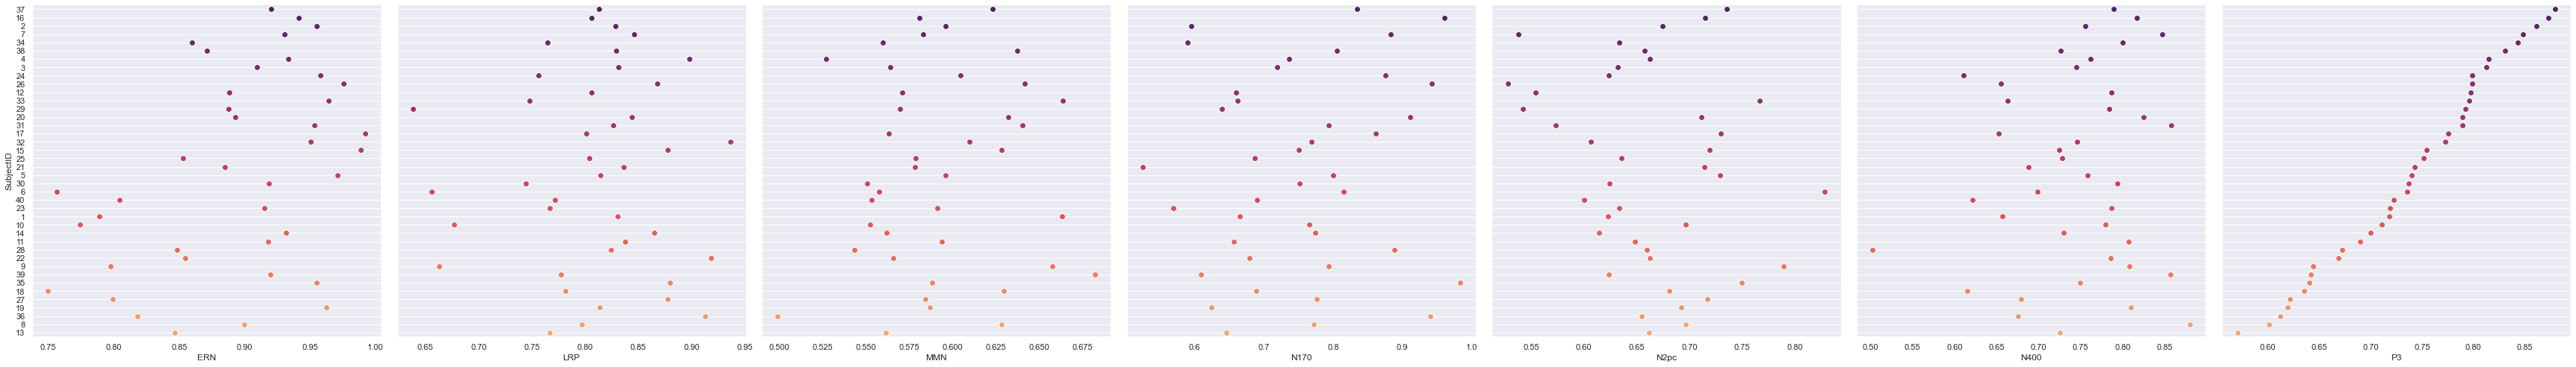

In [62]:
df_list = []
for task in ["N170", "N400", "P3", "N2pc", "MMN", "ERN", "LRP"]:
    model_path = os.getcwd()+"\\"+parameters["model_folder"]+"\\"+parameters[
        "model"]+"\\"+task+"\\"+parameters["preprocessing"]+"\\"
    for i in range(40):
        df = pd.read_json(model_path+"split_"+str(i)+"_history.json")
        
        #max_acc = df["valid_balanced_accuracy"].max() 
        df = df[df["epoch"]==25]
        #df["valid_balanced_accuracy"]=max_acc        
        df["SubjectID"] = i+1
        df["Task"] = task
        df_list.append(df[["Task", "SubjectID", "valid_balanced_accuracy"]])
df = pd.concat(df_list,axis=0)
df = df.pivot(index='SubjectID', columns='Task', values='valid_balanced_accuracy')
df = df.reset_index().reset_index()

for task in ["ERN", "LRP", "MMN", "N170", "N2pc", "N400", "P3"]:
    df = df.sort_values(task, ascending=False)    
    g = sns.PairGrid(df,x_vars=df.columns[2:], y_vars=["SubjectID"],
                     height=7, aspect=1)

    # Draw a dot plot using the stripplot function
    g.map(sns.stripplot, size=8, orient="h", jitter=False,
          palette="flare_r", linewidth=1, edgecolor="w", order=df["SubjectID"])

    for ax in g.axes.flat:
        # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

# Single Subject

In [ ]:
parameters = {
    # data
    "data_path": "F:/Masterthesis/Data",
    "task": "N170",
    "preprocessing": "medium",
    "n_subjects": 40,
    "reject_incorrect_responses": True,
    # model
    "model": "deep",
    "n_classes": 2,
    "n_chans": 30,
    "input_window_samples": 255,
    "seed": 42,
    # classifier
    "lr": 0.01,
    "weight_decay": 0.0,
    "batch_size": 64,
    "n_epochs": 25,
    "n_splits": 10,
    "model_folder": "models_single_subject"
}
for task in ["N170", "N400", "P3", "N2pc", "MMN", "ERN", "LRP"]:
    parameters["task"] = task
    df = DataLoader.load_df(parameters)
    Training.run_exp_single_subject(df, parameters)

In [35]:
df_list = []
for task in ["N170", "N400", "P3", "N2pc", "MMN", "ERN", "LRP"]:
    model_path = os.getcwd()+"\\"+parameters["model_folder"]+"\\"+parameters[
        "model"]+"\\"+task+"\\"+parameters["preprocessing"]+"\\"
    for subjectID in range(40):
        for i in range(1,6):
            df = pd.read_json(model_path+"split_"+str(i)+"_subject_"+str(subjectID)+"_history.json")
            df = df[df["epoch"]==25]
            df["SubjectID"] = subjectID+1
            df["Split"] = i
            df["Task"] = task
            df_list.append(df[["Task", "SubjectID", "Split", "valid_balanced_accuracy"]])
df = pd.concat(df_list,axis=0)

In [29]:
df

,Task,SubjectID,Split,valid_balanced_accuracy
24,N170,1,1,0.435606
24,N170,1,2,0.647727
24,N170,1,3,0.738636
24,N170,1,4,0.693182
24,N170,1,5,0.469697
...,...,...,...,...
24,LRP,40,1,0.725000
24,LRP,40,2,0.612500
24,LRP,40,3,0.650000
24,LRP,40,4,0.687500


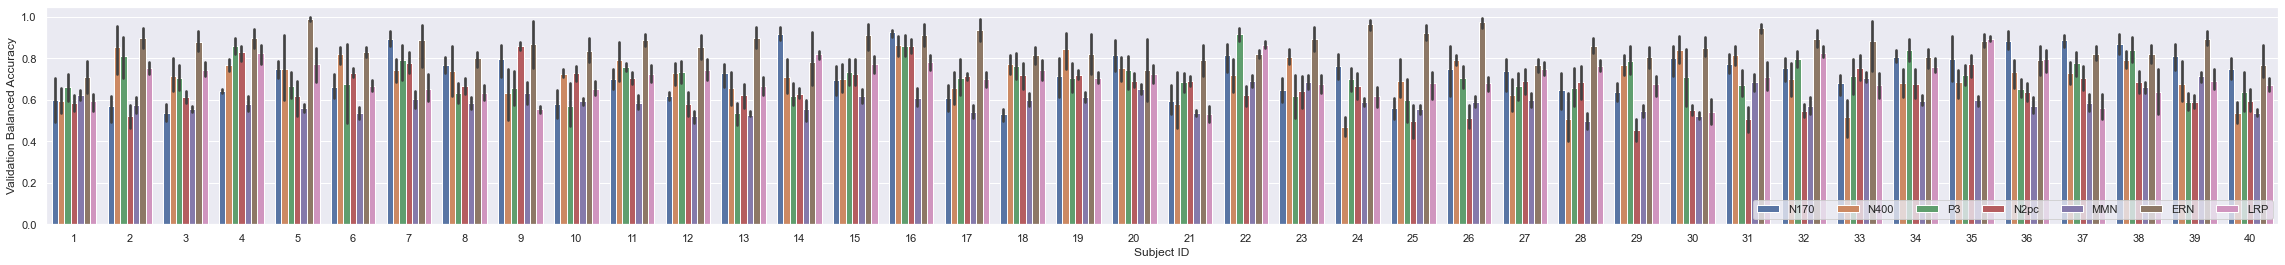

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(40, 4))
fig = sns.barplot(x="SubjectID", y="valid_balanced_accuracy", hue="Task", data=df)
plt.legend(loc='lower right', ncol=7)
fig.set(xlabel='Subject ID', ylabel='Validation Balanced Accuracy');

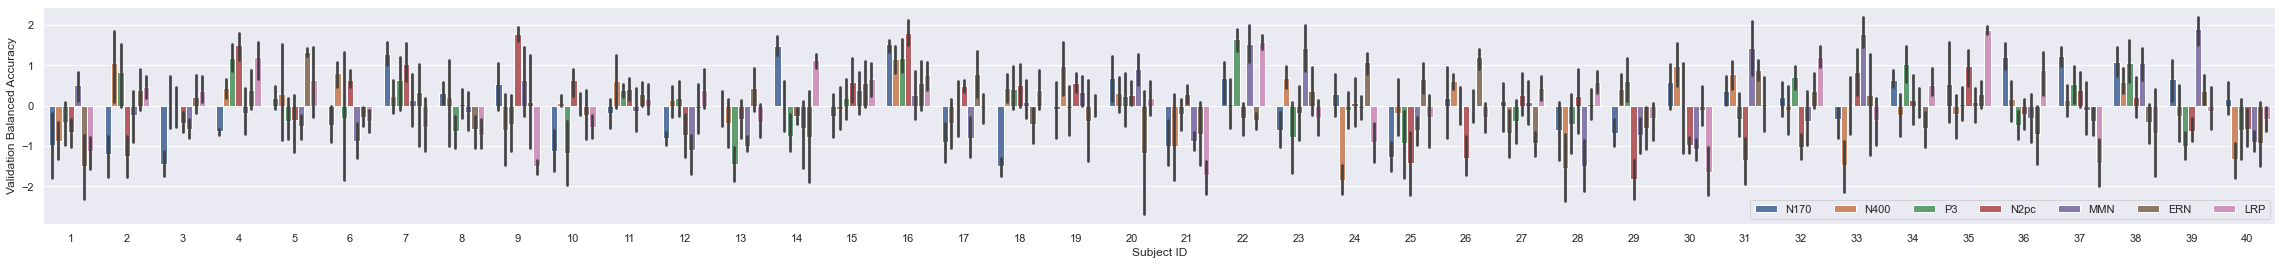

In [31]:
df["valid_balanced_accuracy_normalized"] = df.groupby(["Task"]).transform(lambda x: (x - x.mean()) / x.std())["valid_balanced_accuracy"]
sns.set(style="darkgrid")
plt.figure(figsize=(40, 4))
fig = sns.barplot(x="SubjectID", y="valid_balanced_accuracy_normalized", hue="Task", data=df)
plt.legend(loc='lower right', ncol=7)
fig.set(xlabel='Subject ID', ylabel='Validation Balanced Accuracy');

In [93]:
df_list = []
for task in ["N170", "N400", "P3", "N2pc", "MMN", "ERN", "LRP"]:
    model_path = os.getcwd()+"\\"+parameters["model_folder"]+"\\"+parameters[
        "model"]+"\\"+task+"\\"+parameters["preprocessing"]+"\\"
    for subjectID in range(40):
        for i in range(1,6):
            df = pd.read_json(model_path+"split_"+str(i)+"_subject_"+str(subjectID)+"_history.json")
            df = df[df["epoch"]==25]
            df["SubjectID"] = subjectID+1
            df["Split"] = i
            df["Task"] = task
            df_list.append(df[["Task", "SubjectID", "Split", "valid_balanced_accuracy"]])
df = pd.concat(df_list,axis=0)
df = df.pivot(index=["SubjectID","Split"], columns='Task', values='valid_balanced_accuracy')
df = df.reset_index()
df = df.groupby("SubjectID").mean().iloc[:,1:].reset_index()
df

Task,SubjectID,ERN,LRP,MMN,N170,N2pc,N400,P3
0,1,0.710779,0.592988,0.624538,0.596970,0.584923,0.595238,0.662054
1,2,0.895130,0.752256,0.576683,0.568750,0.519709,0.852381,0.812500
2,3,0.878717,0.743277,0.554586,0.535417,0.611290,0.715152,0.706667
3,4,0.896269,0.825732,0.580239,0.641071,0.828519,0.768182,0.857292
4,5,0.987500,0.770000,0.559554,0.750000,0.618222,0.750000,0.663810
5,6,0.830429,0.666667,0.535955,0.661538,0.730167,0.818182,0.673333
6,7,0.889744,0.653293,0.601306,0.893750,0.775556,0.744444,0.789732
7,8,0.800423,0.632866,0.581975,0.765179,0.664048,0.740000,0.634286
8,9,0.867089,0.554695,0.632580,0.794583,0.858280,0.633333,0.656322
9,10,0.835758,0.653415,0.593312,0.578571,0.730435,0.721818,0.567742


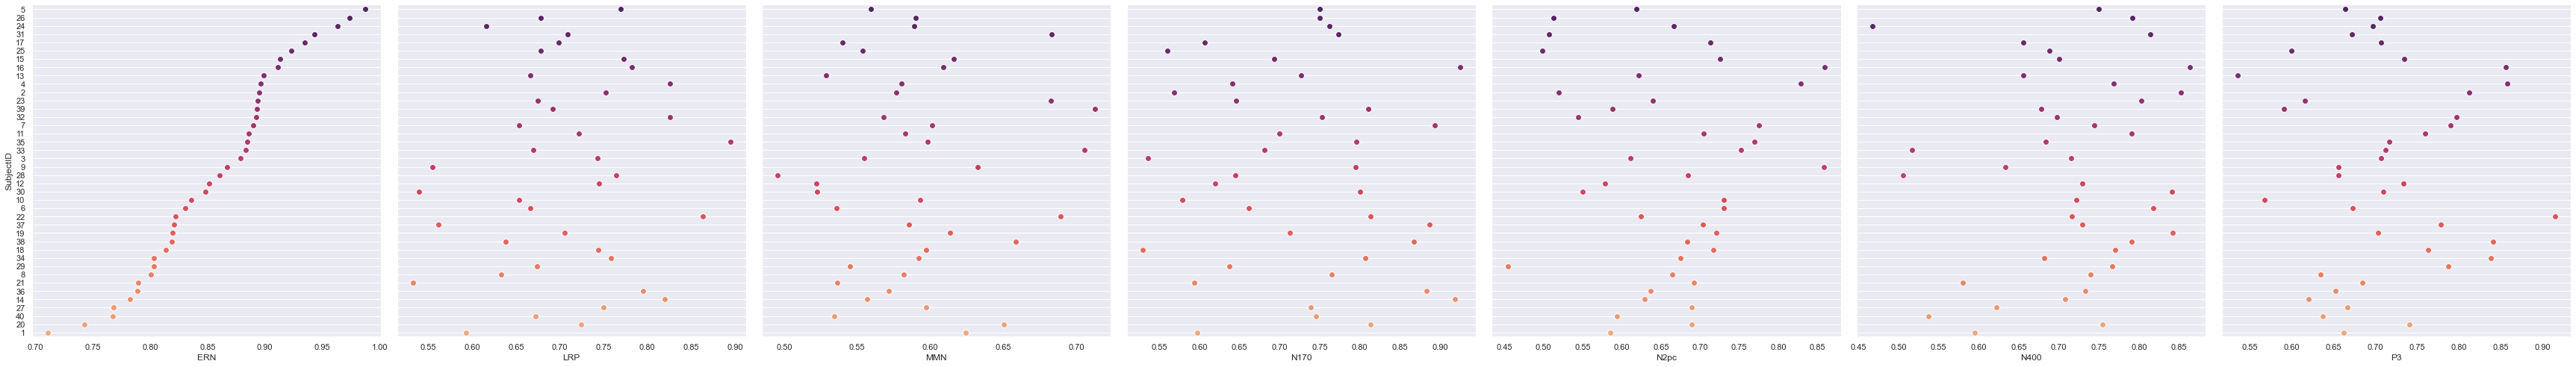

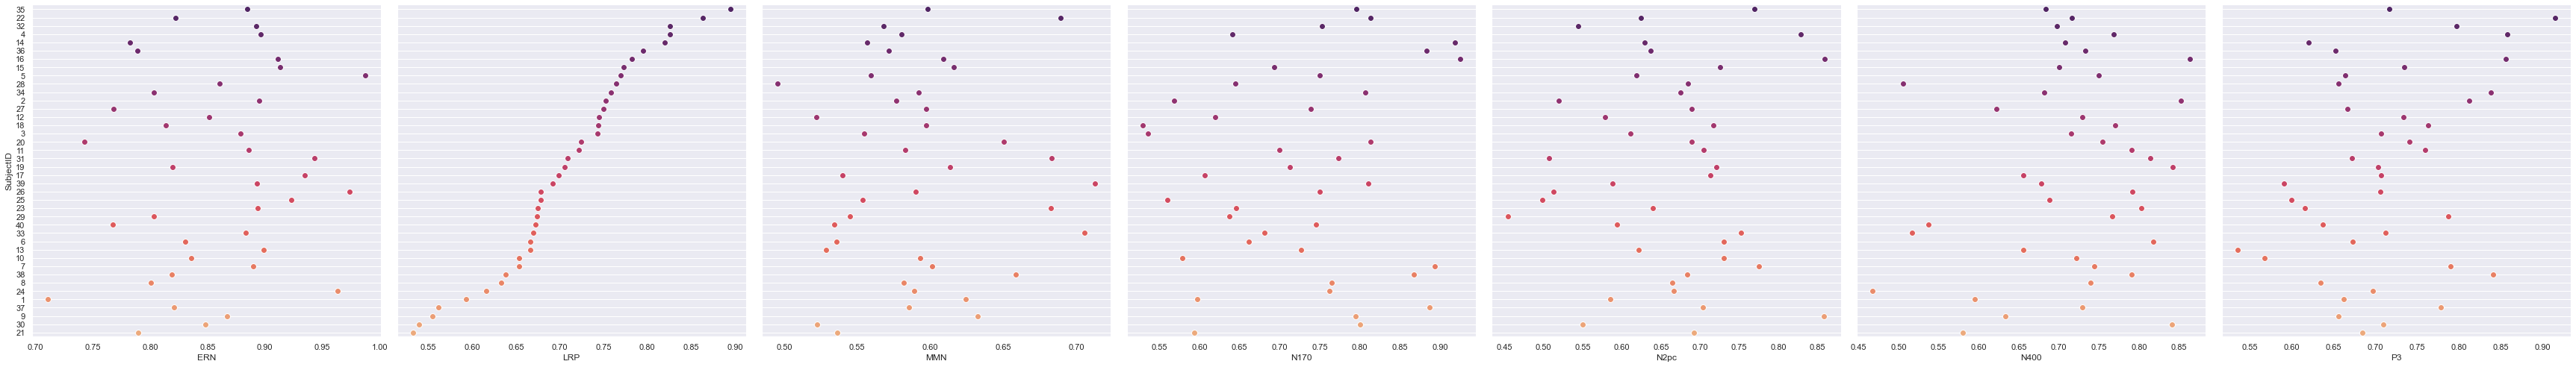

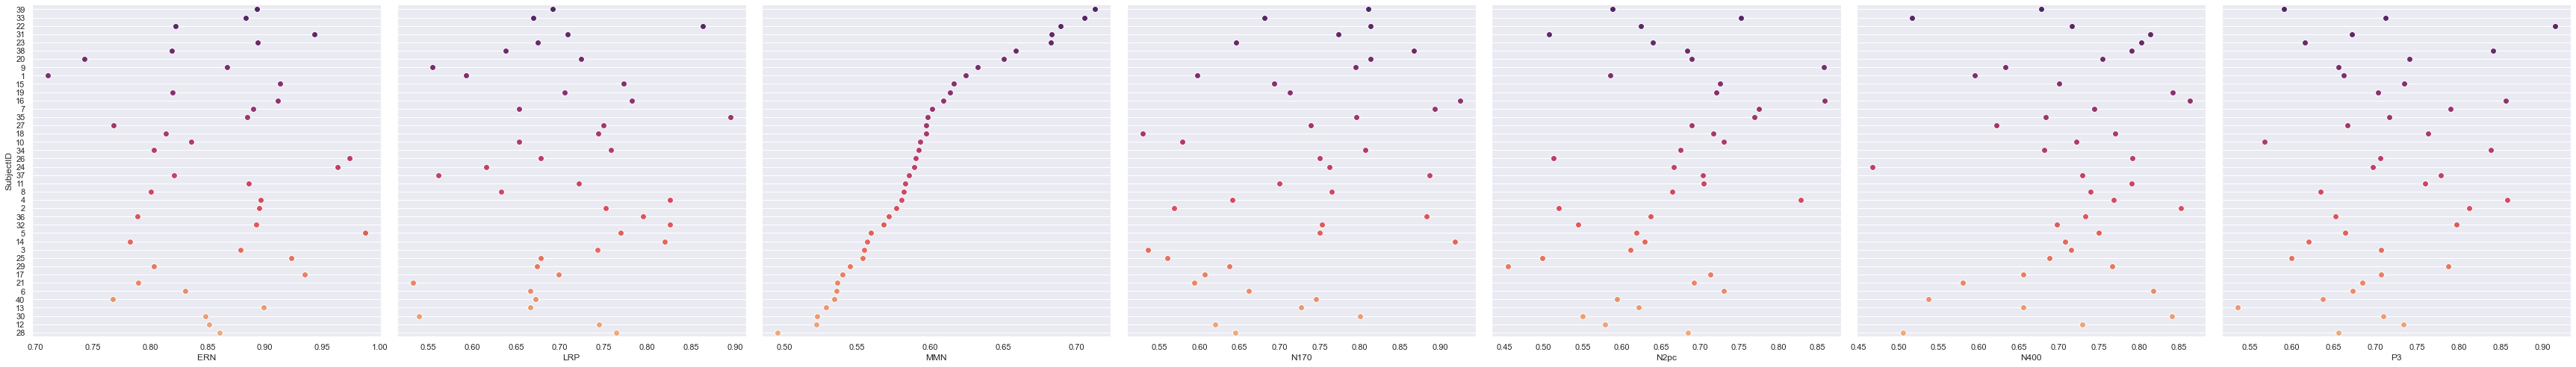

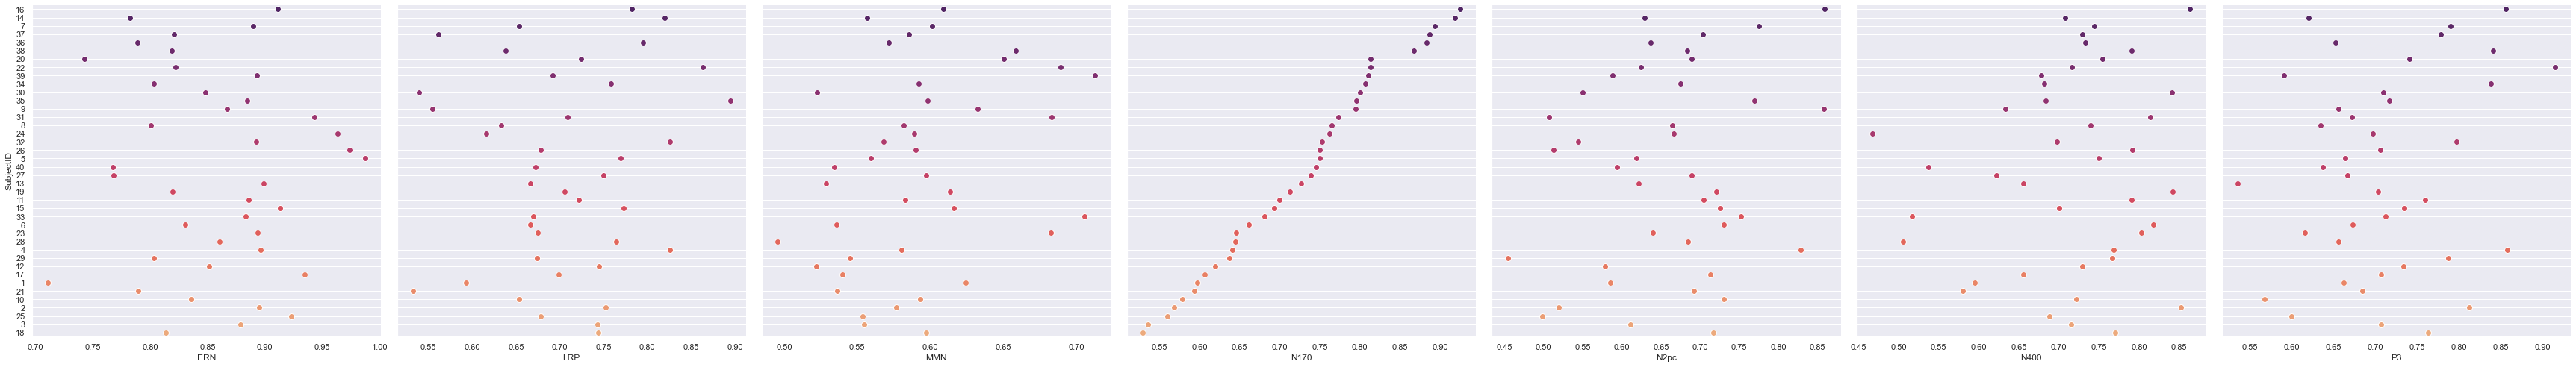

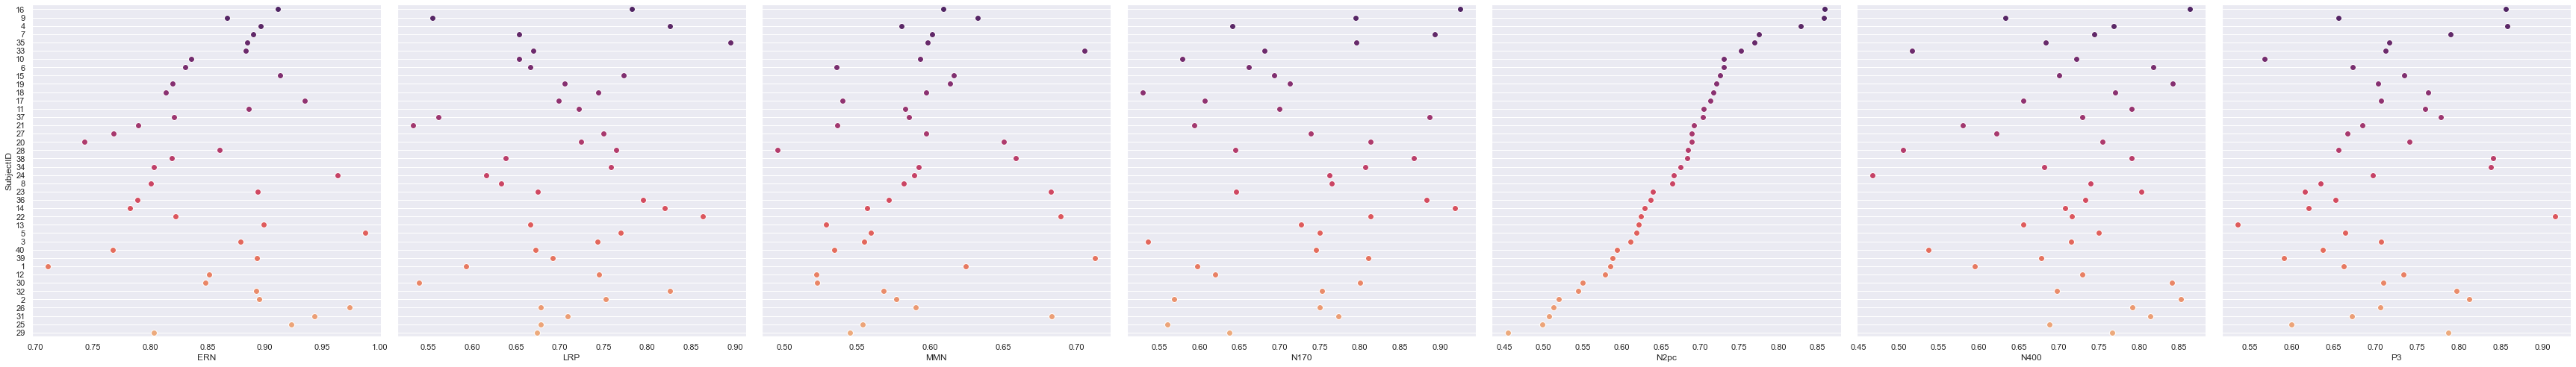

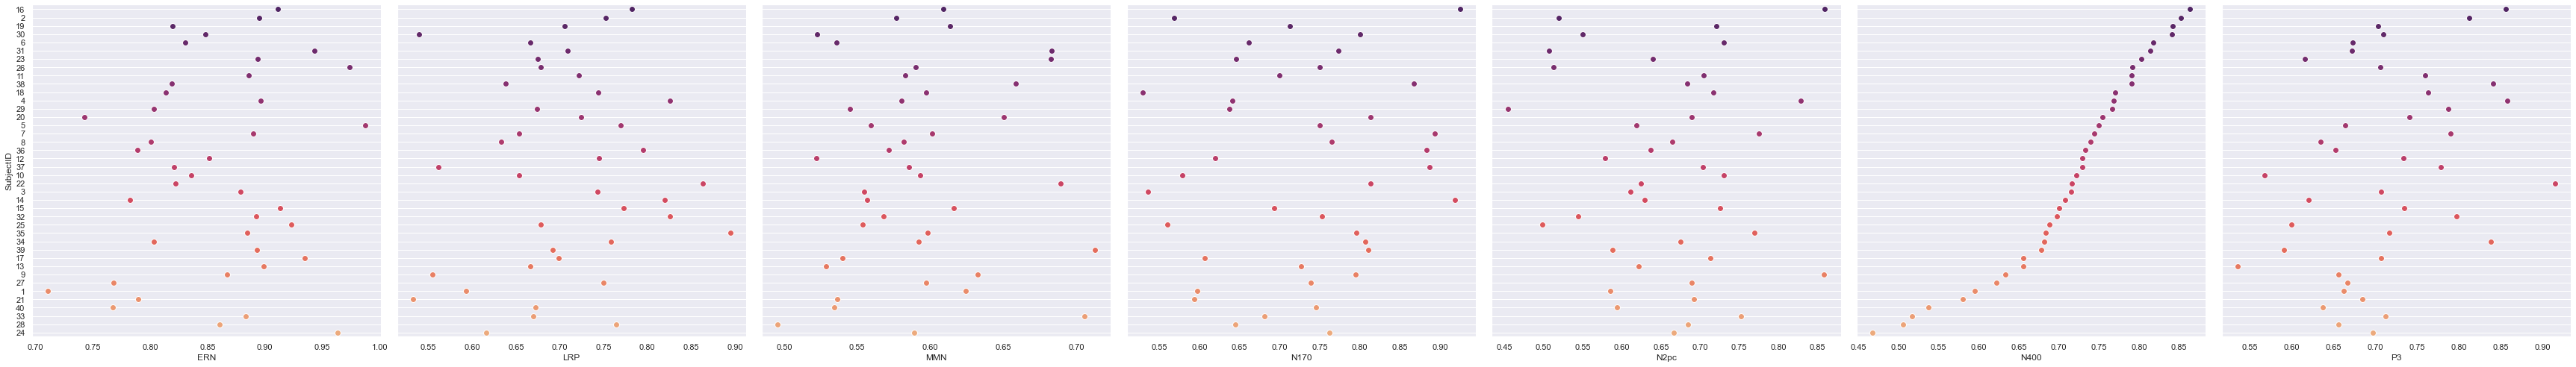

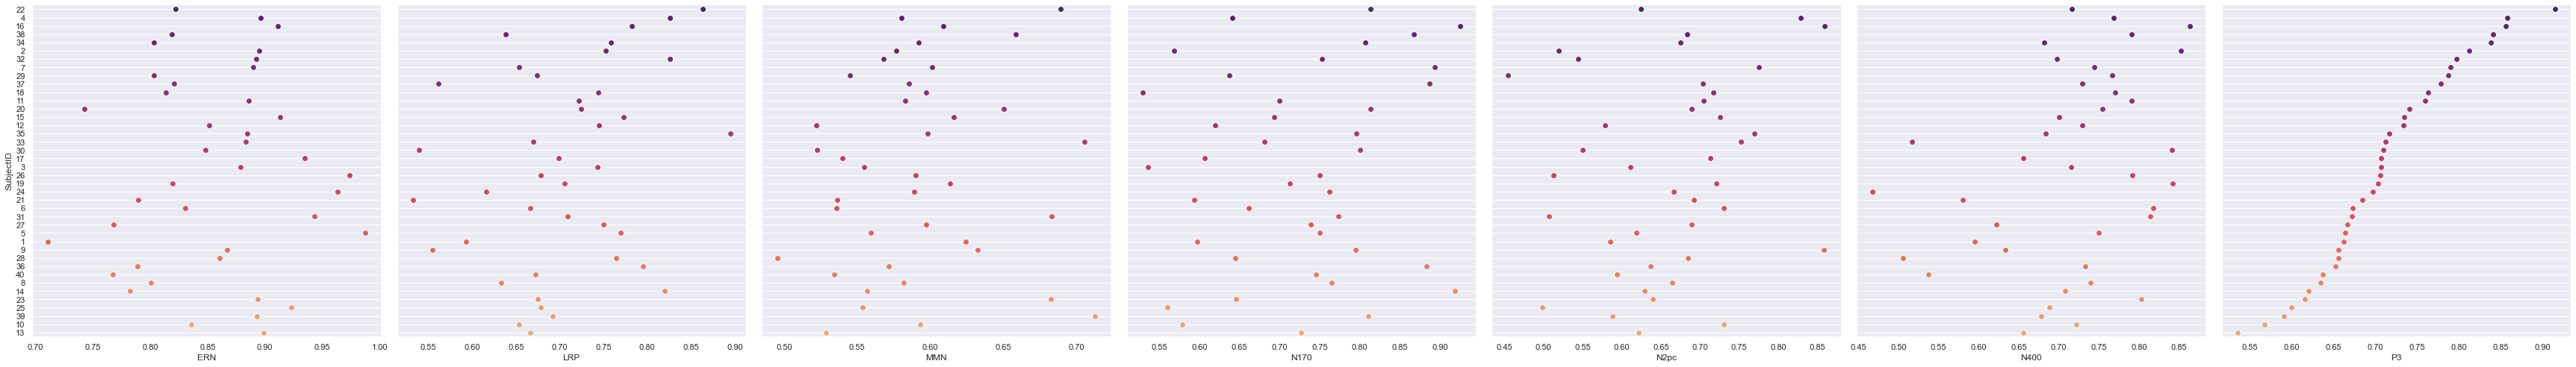

In [94]:
for task in ["ERN", "LRP", "MMN", "N170", "N2pc", "N400", "P3"]:
    df = df.sort_values(task, ascending=False)    
    g = sns.PairGrid(df,x_vars=df.columns[1:], y_vars=["SubjectID"],
                     height=7, aspect=1)

    # Draw a dot plot using the stripplot function
    g.map(sns.stripplot, size=8, orient="h", jitter=False,
          palette="flare_r", linewidth=1, edgecolor="w", order=df["SubjectID"])

    for ax in g.axes.flat:
        # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)